# automatically parse dsc data

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import copy
import sys
import seaborn as sns


In [2]:
sys.path.append("FlowMater")
sys.path.append("IonLib/")
from dataframe_parse import add_unique_IDs

In [3]:
#data load
df_path="temp/df.bin"
df=joblib.load(df_path)
fp_keys=joblib.load("temp/all_fp_keys.bin")
anal_df=add_unique_IDs(df,fp_keys)

IonLib/dataframe_parse.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anal_df["Anneal"][anal_df["Anneal"] >= 1] = 1


In [4]:
processed_df=copy.copy(df)

In [5]:
#list(processed_df.columns)

In [6]:
#calculate crystallinity

#load dsc data

dsc_df=anal_df[anal_df["DSC_load_data"]==anal_df["DSC_load_data"]]
dsc_df=dsc_df[dsc_df["Salt MW"]==dsc_df["Salt MW"]]


#salt_df=dsc_df[dsc_df["manual condition"].str.contains("([A-Z])100LG")]

#extract salt and enthalpy data
salt_df=dsc_df[dsc_df['Salt weight ratio']==1]
salt_df=salt_df[salt_df["Salt MW"]==salt_df["Salt MW"]]
enthalpy_dict={i[0]:i[1] for i in salt_df[["Salt MW","DSC (salt_melting_heat_energy)"]].values}

#calculate crystallinity of salt parts
temp_df=dsc_df[["Salt MW","DSC (salt_melting_heat_energy)","Salt weight ratio"]]
#dsc_df["DSC Crystallinity(%)"]
temp_df["max enthalpy"]=temp_df["Salt MW"].replace(enthalpy_dict)
temp_df["DSC Crystallinity (%)"]=temp_df["DSC (salt_melting_heat_energy)"]/temp_df["max enthalpy"]*100
temp_df["DSC Crystallinity (%)"]=temp_df["DSC Crystallinity (%)"]/temp_df["Salt weight ratio"]           #normalize by salt weight ratio
temp_df["DSC Melting enthalpy (J/g)"]=temp_df["DSC (salt_melting_heat_energy)"]
#temp_df["DSC Melting temperature ($^\mathrm{o}$C)"]=dsc_df["DSC_salt_melt_temp"].str.replace(" oC","").astype(float)

temp_df=temp_df.drop(['DSC (salt_melting_heat_energy)','Salt weight ratio','max enthalpy',"Salt MW"],axis=1)
parsed_dict=temp_df.to_dict(orient="index")

#delete nan data
for ind in parsed_dict:
    for k in list(parsed_dict[ind]):
        if parsed_dict[ind][k]!=parsed_dict[ind][k]:
            parsed_dict[ind].pop(k)
            
joblib.dump(parsed_dict,"temp/parsed/dsc_anal.bin")

/home/user/anaconda3/envs/mi/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/anaconda3/envs/mi/lib/python3.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/anaconda3/envs/mi/lib/python3.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

['temp/parsed/dsc_anal.bin']

In [7]:
for ind in parsed_dict:
    for k in list(parsed_dict[ind]):
        if parsed_dict[ind][k]!=parsed_dict[ind][k]:
            print(parsed_dict[ind])
            

In [8]:
parsed_dict

{'normal_experiment54_database/experiments/MU/dsc/1202/libf4/dsc.graphml': {'DSC Crystallinity (%)': 100.0,
  'DSC Melting enthalpy (J/g)': 138.7},
 'normal_experiment50_database/experiments/MU/dsc/1118/litfsi/dsc.graphml': {'DSC Crystallinity (%)': 100.0,
  'DSC Melting enthalpy (J/g)': 69.8},
 'normal_experiment49_database/experiments/MU/dsc/1118/liftfsi/dsc.graphml': {'DSC Crystallinity (%)': 100.0,
  'DSC Melting enthalpy (J/g)': 121.6},
 'normal_experiment55_database/experiments/MU/dsc/1202/lifsi/dsc.graphml': {'DSC Crystallinity (%)': 100.0,
  'DSC Melting enthalpy (J/g)': 176.1},
 'normal_experiment24_database/experiments/HA/exp199_dsc/s96/dsc.graphml': {'DSC Crystallinity (%)': 0.0,
  'DSC Melting enthalpy (J/g)': 0.0},
 'normal_experiment26_database/experiments/HA/exp203_dsc/s97/dsc.graphml': {'DSC Crystallinity (%)': 0.0,
  'DSC Melting enthalpy (J/g)': 0.0},
 'normal_experiment23_database/experiments/HA/exp199_dsc/s95/dsc.graphml': {'DSC Crystallinity (%)': 0.0,
  'DSC Melti

# visualize

In [9]:
def check_peak(val,data_array,N=15):
    peak_pos=np.where(data_array[:,0]==val)[0][0]
    data_length=data_array.shape[0]
    if peak_pos>data_length/N and peak_pos<data_length*(N-1)/N:
        return peak_pos
    else:
        return -1

def split_fragment_data(data_array):
        
    max_val=max(data_array[:,0])
    min_val=min(data_array[:,0])
    max_val,min_val


    peak_pos=-1
    if max_val>(data_array[0,0]) and max_val>(data_array[-1,0]):
        peak_pos=check_peak(max_val,data_array)

    if peak_pos==-1 and (min_val<(data_array[0,0]) and min_val<(data_array[-1,0])):
        peak_pos=check_peak(min_val,data_array)

    if peak_pos==-1:
        data_array=[data_array]
    else:
        data_array=[data_array[:peak_pos],data_array[peak_pos:]]

    return data_array

def auto_load(data_path):
    with open(data_path,"r", errors='ignore',encoding="UTF-16") as f:
        txt=f.read()

    txt_lines=txt.split("\n")

    #find end of header
    for header_pos in range(len(txt_lines)):
        if txt_lines[header_pos].find("OrgFile")>=0:
            break
    header_pos+=3

    #set main data lines
    main_lines=txt_lines[header_pos:-3]

    #split cycles
    data_dict={}
    current_cycle=0
    start_pos=0
    for pos in range(len(main_lines)):
        current_line=main_lines[pos]
        if current_line=='-2.000000 1.000000 0.0000000' or pos==len(main_lines)-1:

            data=main_lines[start_pos:pos]
            data=[i.split(" ") for i in data]
            
            #remove broken record
            data=[i for i in data if len(i)==3]
            data_array=np.array(data).astype(float)

            #first columns is unnecessary
            data_array=data_array[:,1:]

            #split fragment
            data_array=split_fragment_data(data_array)
            for num,d in enumerate(data_array):
                df=pd.DataFrame(d).astype(float)
                df.columns=["Temperature","Heat"]
                data_dict[f"{current_cycle+1}-{num+1}"]=df

            current_cycle+=1
            start_pos=pos+1

    return data_dict

In [10]:
#load dsc data
dsc_dict={}

dsc_load_label="DSC_load_data"
for i in range(processed_df.shape[0]):
    if not processed_df[dsc_load_label][i]==processed_df[dsc_load_label][i]:
        continue
    data_path=processed_df[dsc_load_label][i]

    ind=processed_df.index[i]
    
    dsc_dict[ind]=auto_load(data_path)


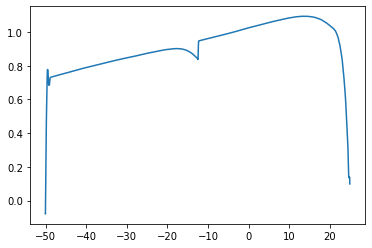

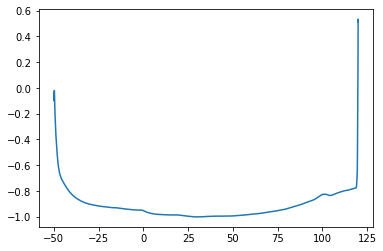

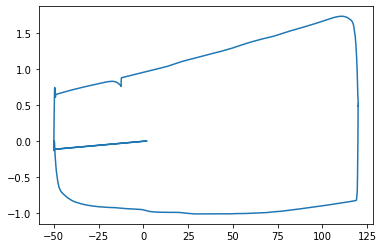

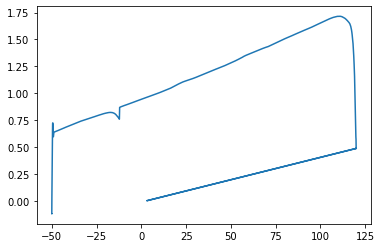

In [11]:
for k1 in dsc_dict.keys():
    for k2 in dsc_dict[k1].keys():
        df=dsc_dict[k1][k2]
        plt.figure()
        plt.plot(df["Temperature"],df["Heat"],linestyle="solid")
    break

In [12]:

        
    
def get_plot_data(electrolyte,current_df,x_range=(-100,200),x_name="Temperature",y_name="Heat",
             target_fragment="1-1",
             exceptional_dict={}):

    if not electrolyte in list(current_df["manual condition"]):
        raise ValueError(f"{electrolyte} not found")
    for i in range(current_df.shape[0]):
        if electrolyte==current_df["manual condition"][i]:
            break
            
    #print(electrolyte)
    current_id=sel_df.index[i]

    set_fragment=target_fragment
    offset=0

    if electrolyte in exceptional_dict.keys():
        set_fragment,offset,x_range=exceptional_dict[electrolyte]

    data_df=copy.copy(dsc_dict[current_id][set_fragment])
    data_df=data_df[data_df[x_name]>x_range[0]]
    data_df=data_df[data_df[x_name]<x_range[1]]

    amount=current_df["DSC (sample amount)"][i]
    data_df[y_name]=data_df[y_name]/amount+offset

    #plt.plot(data_df[x_name],data_df[y_name],label=electrolyte,alpha=0.8,linewidth=1)

    x=np.array(data_df[x_name])
    y=np.array(data_df[y_name])
    return x,y
        
        #return x,y
        

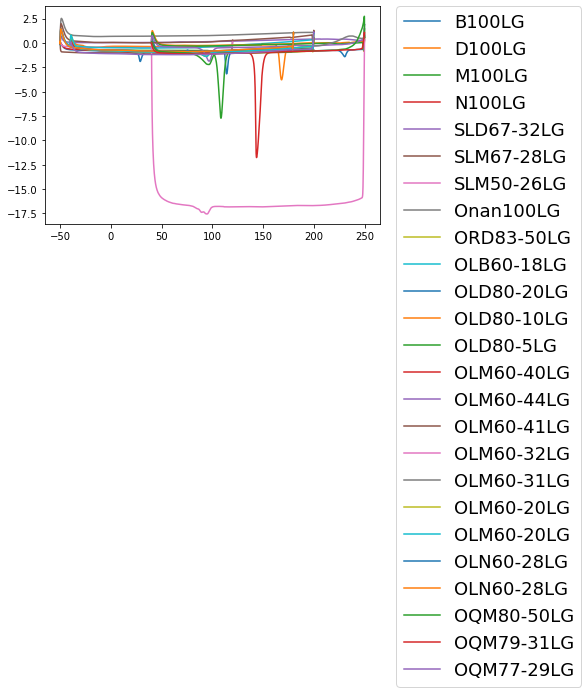

In [13]:
sel_df=anal_df[anal_df["DSC_load_data"]==anal_df["DSC_load_data"]]
all_electrolyte_list=list(sel_df["manual condition"])

#delete data for ppo
#all_electrolyte_list.remove("120.15100LG")

exceptional_dict={}
"""exceptional_dict["OLM5-17LG"]=("1-1",15,(50,500))
exceptional_dict["OQM69-12LG"]=("1-1",0,(-500,500))
exceptional_dict["OQM61-24LG"]=("1-1",0,(-500,500))
exceptional_dict["OLM54-9LG"]=("1-1",0,(-500,500))
exceptional_dict["OLM52-14LG"]=("1-1",0,(-500,500))
exceptional_dict["OLD73-8LG"]=("1-1",0,(-500,500))
exceptional_dict["OLD77-4LG"]=("1-1",0,(-500,500))
exceptional_dict["OLD79-2LG"]=("1-1",0,(-500,500))
"""

temp_list=["OLD80-20LG",
"OLD80-10LG",
"OLD80-5LG",
"OLM60-44LG",
"OLM60-32LG",
"OLM60-31LG",
"OQM80-50LG",
"OQM79-31LG",
          ]
for k in temp_list:
    exceptional_dict[k]=("1-1",0,(-500,500))


exceptional_dict['SLD67-32LG']=("2-1",0,(-500,500))
exceptional_dict['SLM67-28LG']=("2-1",0,(-500,500))
exceptional_dict['SLM50-26LG']=("2-1",0,(-500,500))


for electrolyte in all_electrolyte_list:

     
    #plt.figure()
    
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=exceptional_dict)
    plt.plot(x,y,label=electrolyte)
    
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


# plots for article

# salts

Text(0, 0.5, 'Heat flow (W/g)')

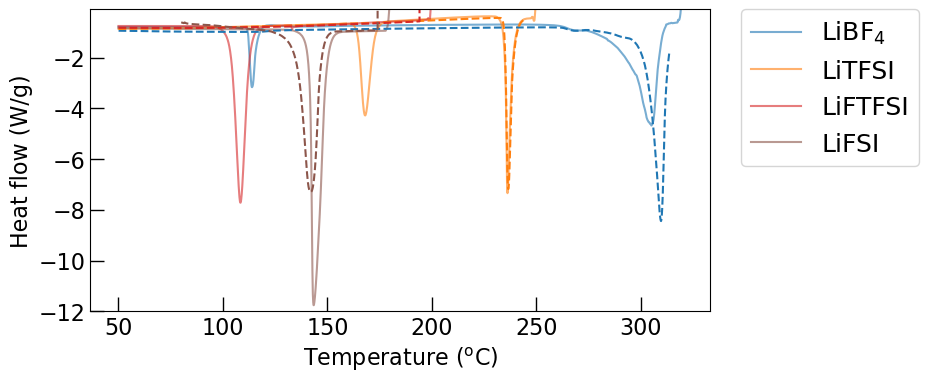

In [14]:
#compare salt

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.size"] = 16

fig = plt.figure(figsize=(8,4),dpi=100)


salt_name_dict={
    "B100LG": "LiBF$_{4}$",
    "D100LG": "LiTFSI",
    "M100LG": "LiFTFSI",
    "N100LG": "LiFSI",
}

salt_plot_dict={}
for k in salt_name_dict:
    if k in exceptional_dict.keys():
        salt_plot_dict[k]=exceptional_dict[k]


cm = plt.get_cmap("tab10")
N=6

salt_plot_dict["D100LG"]=("1-2",-0.5,(50,500))


#1st cycle
for i,electrolyte in enumerate(salt_name_dict):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=salt_plot_dict,x_range=(50,400))
    plt.plot(x,y,label=salt_name_dict[electrolyte],color=cm(i/N),alpha=0.6)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#2nd cycle
plot_dict={}
plot_dict["N100LG"]=("2-2",0,(80,500))
plot_dict["D100LG"]=("2-2",-0.5,(50,500))


for i,electrolyte in enumerate(salt_name_dict):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="2-2",exceptional_dict=plot_dict,x_range=(50,400))
    plt.plot(x,y,label=salt_name_dict[electrolyte], linestyle = "dashed",color=cm(i/N))

plt.ylim(-12,-0.1)
plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")

Text(0, 0.5, 'Heat flow (W/g)')

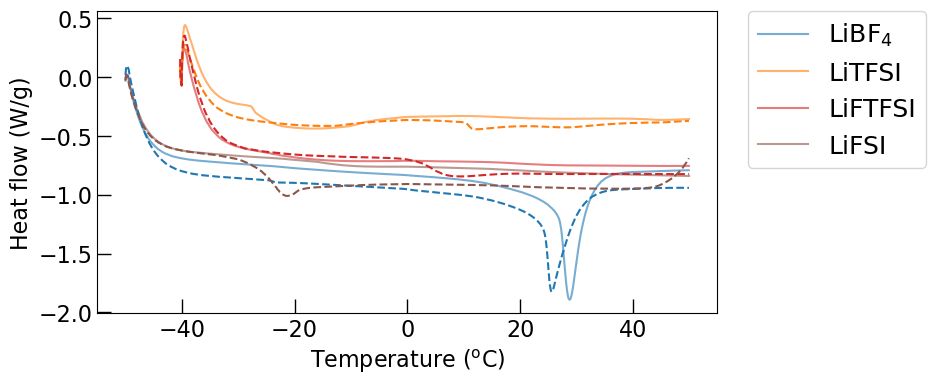

In [15]:
fig = plt.figure(figsize=(8,4),dpi=100)
salt_plot_dict=copy.copy(exceptional_dict)


#1st cycle
for i,electrolyte in enumerate(salt_name_dict):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=salt_plot_dict,x_range=(-50,50))
    plt.plot(x,y,label=salt_name_dict[electrolyte],color=cm(i/N),alpha=0.6)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

for i,electrolyte in enumerate(salt_name_dict):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="2-2",exceptional_dict=salt_plot_dict,x_range=(-50,50))
    plt.plot(x,y,label=salt_name_dict[electrolyte], linestyle = "dashed",color=cm(i/N))

#plt.ylim(-12,-0.1)
plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")

# FTFSI electrolytes

not used:  set()


Text(0, 0.5, 'Heat flow (W/g)')

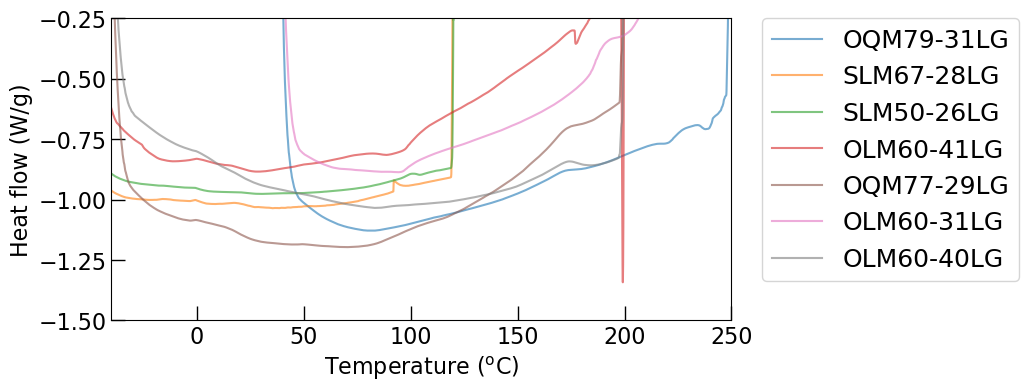

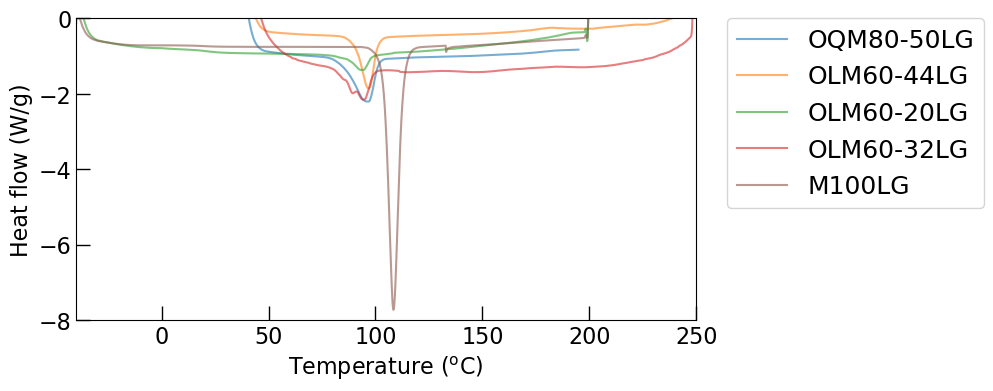

In [16]:

fig = plt.figure(figsize=(8,4),dpi=100)
#plot_dict=copy.copy(exceptional_dict)

FTFSI_electrolyte_list=set(all_electrolyte_list)-set(salt_name_dict)
FTFSI_electrolyte_list=[i for i in FTFSI_electrolyte_list if i[2]=="M"]
FTFSI_electrolyte_list.append("M100LG")
cm = plt.get_cmap("tab10")
N=8

#no crystal peak
plot_dict={}

plot_dict[ 'OQM79-31LG']=("1-1",0,(-45,300))
plot_dict[ 'SLM67-28LG']=("2-1",0,(-45,300))
plot_dict[ 'SLM50-26LG']=("2-1",-0.5,(-45,300))
plot_dict[ 'OLM60-41LG']=("1-2",-0.9,(-45,300))
plot_dict[ 'OQM77-29LG']=("1-2",0,(-45,300))
plot_dict[ 'OLM60-31LG']=("1-1",0,(-45,300))
plot_dict[ 'OLM60-40LG']=("1-2",0,(-45,300))


#crystal peaks
plot_dict2={}
plot_dict2[ 'OQM80-50LG']=("1-1",0,(-45,195))
plot_dict2[ 'OLM60-44LG']=("1-1",0,(-45,300))
plot_dict2[ 'OLM60-20LG']=("1-2",0,(-45,300))
plot_dict2[ 'OLM60-32LG']=("1-1",15.4,(-45,300))
plot_dict2[ "M100LG"]=("1-2",0,(-45,300))



print("not used: ", set(FTFSI_electrolyte_list)-set(plot_dict)-set(plot_dict2))

#amorphous
for i,electrolyte in enumerate(plot_dict):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=plot_dict,x_range=(-500,250))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=0.6)
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.ylim(-1.5,-0.25)
plt.xlim(-40,250)

plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")

#crystalline
fig = plt.figure(figsize=(8,4),dpi=100)

#crystal
for i,electrolyte in enumerate(plot_dict2):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=plot_dict2,x_range=(-500,250))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

plt.ylim(-8,0)
plt.xlim(-40,250)


plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")

Text(0, 0.5, 'Heat flow (W/g)')

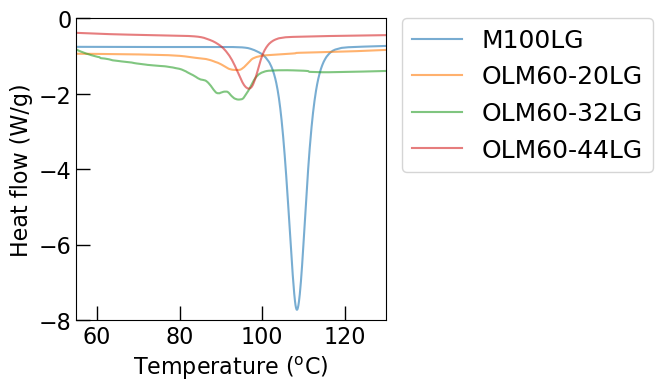

In [17]:
#crystal peaks
plot_dict2={}
plot_dict2[ "M100LG"]=("1-2",0,(-45,300))
plot_dict2[ 'OLM60-20LG']=("1-2",0,(-45,300))
plot_dict2[ 'OLM60-32LG']=("1-1",15.4,(-45,300))
plot_dict2[ 'OLM60-44LG']=("1-1",0,(-45,300))

#crystalline
fig = plt.figure(figsize=(4,4),dpi=100)

for i,electrolyte in enumerate(plot_dict2):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=plot_dict2,x_range=(-500,250))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

plt.ylim(-8,0)
plt.xlim(55,130)

plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")



Text(0, 0.5, 'Heat')

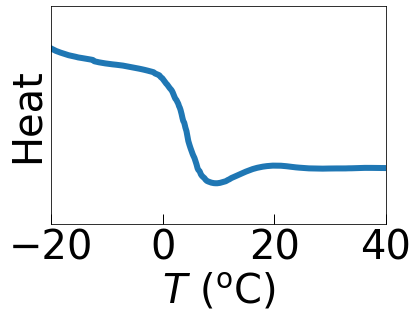

In [18]:

plot_dict2={}
plot_dict2[ "M100LG"]=("2-2",0,(-45,300))

for i,electrolyte in enumerate(plot_dict2):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=plot_dict2,x_range=(-500,250))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=1,linewidth=6)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

plt.ylim(-0.9,-0.6)
plt.xlim(-20,40)
#plt.xlim(0,15)



fontsize=40
plt.tick_params(width = 1, length = 10,labelsize=fontsize)
plt.yticks([])
plt.xticks([-20,0,20,40])

plt.xlabel("$T$ ($^\mathrm{o}$C)",fontsize=fontsize)
plt.ylabel("Heat",fontsize=fontsize)



In [19]:
sel_df

,donor_amount_keyword,donor_amount_weight,donor_amount_compound name,donor_amount_SMILES,donor_amount_Mw,donor_amount_Mn,acceptor_amount_keyword,acceptor_amount_weight,acceptor_amount_compound name,acceptor_amount_SMILES,...,DSC (salt_melting_heat_energy),DSC (sample amount),1st Day (unix),2nd Day (unix),Date difference,Total ball mill time (min),Total heat time (min),Sealer,Anneal,manual condition
normal_experiment54_database/experiments/MU/dsc/1202/libf4/dsc.graphml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.7000,4.41,1.638716e+09,1.638371e+09,-345600.0,0.0,0.0,0.0,0.0,B100LG
normal_experiment50_database/experiments/MU/dsc/1118/litfsi/dsc.graphml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.8000,2.50,1.629644e+09,1.637161e+09,7516800.0,0.0,0.0,0.0,0.0,D100LG
normal_experiment49_database/experiments/MU/dsc/1118/liftfsi/dsc.graphml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.6000,2.21,1.637161e+09,1.637161e+09,0.0,0.0,0.0,0.0,0.0,M100LG
normal_experiment55_database/experiments/MU/dsc/1202/lifsi/dsc.graphml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,176.1000,3.54,1.638716e+09,1.638371e+09,-345600.0,0.0,0.0,0.0,0.0,N100LG
normal_experiment24_database/experiments/HA/exp199_dsc/s96/dsc.graphml,PMPS(S-81),142.8 mg,PMPS,CC1=C(S[*])C(C)=CC([*])=C1,7000.0,18000.0,Chloranil(Aldrich1),128.6 mg,Chloranil,O=C(C(Cl)=C1Cl)C(Cl)=C(Cl)C1=O,...,0.0000,2.10,1.632064e+09,1.632150e+09,86400.0,40.0,45.0,0.0,0.0,SLD67-32LG
normal_experiment26_database/experiments/HA/exp203_dsc/s97/dsc.graphml,PMPS(S-81),195.4 mg,PMPS,CC1=C(S[*])C(C)=CC([*])=C1,7000.0,18000.0,Chloranil(Aldrich1),177.5 mg,Chloranil,O=C(C(Cl)=C1Cl)C(Cl)=C(Cl)C1=O,...,0.0000,1.26,1.632323e+09,1.632323e+09,0.0,40.0,180.0,0.0,0.0,SLM67-28LG
normal_experiment23_database/experiments/HA/exp199_dsc/s95/dsc.graphml,PMPS(S-81),151.6 mg,PMPS,CC1=C(S[*])C(C)=CC([*])=C1,7000.0,18000.0,Chloranil(Aldrich1),274.3 mg,Chloranil,O=C(C(Cl)=C1Cl)C(Cl)=C(Cl)C1=O,...,0.0000,2.10,1.632064e+09,1.632150e+09,86400.0,40.0,45.0,0.0,0.0,SLM50-26LG
normal_experiment56_database/experiments/MU/dsc/1202/ppo/dsc.graphml,PPO(Aldrich1),100 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.62,1.638716e+09,1.638371e+09,-345600.0,0.0,0.0,0.0,0.0,Onan100LG
normal_experiment45_database/experiments/MU/dsc/1114/1021/dsc.graphml,PPO(Aldrich1),199.1 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Bromanil_1,145.8 mg,Bromanil,O=C(C(Br)=C(C1=O)Br)C(Br)=C1Br,...,0.0000,1.86,1.634742e+09,1.636816e+09,2073600.0,35.0,110.0,0.0,0.0,ORD83-50LG
normal_experiment52_database/experiments/MU/dsc/1202/1122/dsc.graphml,PPO(Aldrich1),204.8 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Chloranil(Aldrich1),275.6 mg,Chloranil,O=C(C(Cl)=C1Cl)C(Cl)=C(Cl)C1=O,...,8.0260,0.94,1.637507e+09,1.638371e+09,864000.0,150.0,105.0,0.0,0.0,OLB60-18LG


# others

Text(0, 0.5, 'Heat flow (W/g)')

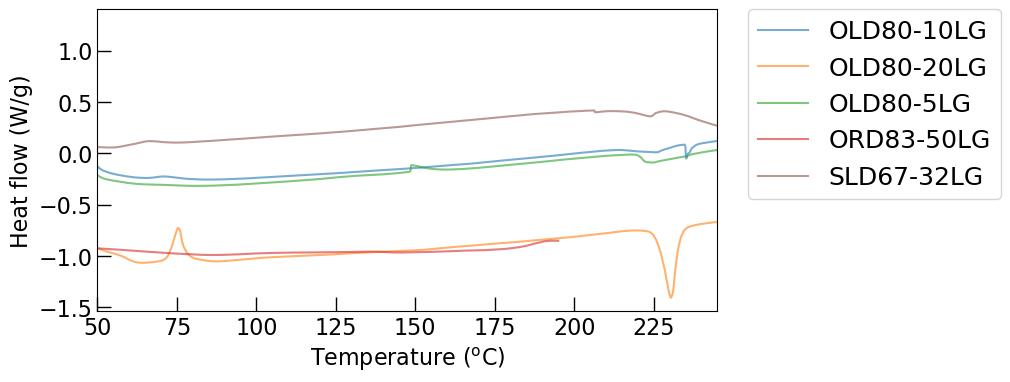

In [20]:
fig = plt.figure(figsize=(8,4),dpi=100)
#plot_dict=copy.copy(exceptional_dict)

TFSI_electrolyte_list=set(all_electrolyte_list)-set(salt_name_dict)
TFSI_electrolyte_list=[i for i in TFSI_electrolyte_list if i[2]=="D"]
TFSI_electrolyte_list=sorted(TFSI_electrolyte_list)
cm = plt.get_cmap("tab10")
N=8


TFSI_plot_dict={}
for k in TFSI_electrolyte_list:
    if k in exceptional_dict.keys():
        TFSI_plot_dict[k]=exceptional_dict[k]

TFSI_plot_dict['SLD67-32LG']=("2-1",0,(40,250))
TFSI_plot_dict['ORD83-50LG']=("1-2",0,(40,195))



#amorphous
for i,electrolyte in enumerate(TFSI_electrolyte_list):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=TFSI_plot_dict,x_range=(100,250))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=0.6)
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


#plt.ylim(-1.5,-0.25)
plt.xlim(50,245)

plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")



{'OLN60-28LG', 'OLM60-32LG', 'OLB60-18LG', 'OLM60-44LG', 'Onan100LG', 'OLM60-20LG', 'OQM80-50LG'}


Text(0, 0.5, 'Heat flow (W/g)')

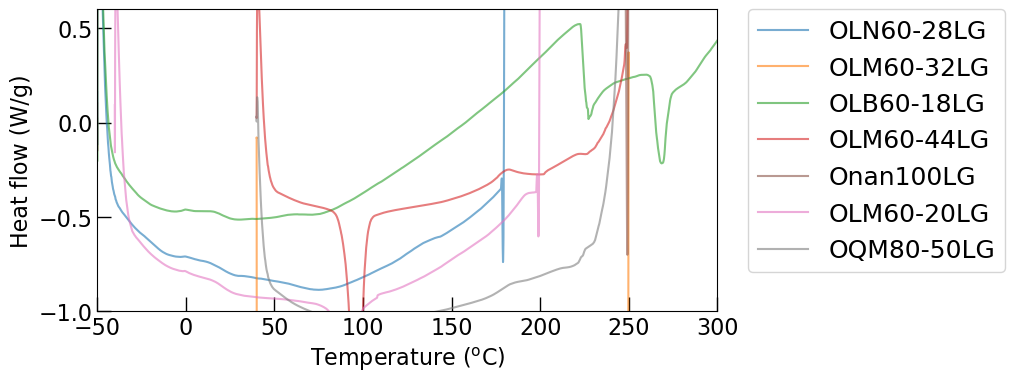

In [21]:
#others

other_electrolytes=set(all_electrolyte_list)-set(plot_dict)-set(plot_dict2)-set(salt_name_dict)-set(TFSI_electrolyte_list)
print(other_electrolytes)


fig = plt.figure(figsize=(8,4),dpi=100)


for i,electrolyte in enumerate(other_electrolytes):
    x,y=get_plot_data(electrolyte,sel_df,target_fragment="1-2",exceptional_dict=exceptional_dict,x_range=(-500,300))
    plt.plot(x,y,label=electrolyte,color=cm(i/N),alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

plt.ylim(-1,0.6)
plt.xlim(-50,300)

plt.tick_params(width = 1, length = 10)
plt.xlabel("Temperature ($^\mathrm{o}$C)")
plt.ylabel("Heat flow (W/g)")

